In [55]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

Populating the interactive namespace from numpy and matplotlib


In [56]:
#I am starting with a single month of data: reading data from citibike csv file from Aug 2018
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.csv.zip")
                    #https://s3.amazonaws.com/tripdata/JC-201808-citibike-tripdata.csv.zip
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.csv.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [57]:
datestring = 'JC-201808'
getCitiBikeCSV(datestring)

file in place, you can continue


In [92]:

df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,903,2018-08-01 06:40:33.3610,2018-08-01 06:55:37.1060,3183,Exchange Place,40.716247,-74.033459,3270,Jersey & 6th St,40.725289,-74.045572,29612,Subscriber,1977,1,2018-08-01 06:40:33.361
1,78,2018-08-01 08:21:00.1450,2018-08-01 08:22:18.6310,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29791,Subscriber,1975,1,2018-08-01 08:21:00.145
2,405,2018-08-01 08:43:52.5150,2018-08-01 08:50:37.6140,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29571,Subscriber,1973,1,2018-08-01 08:43:52.515
3,155,2018-08-01 09:48:24.9450,2018-08-01 09:51:00.9360,3183,Exchange Place,40.716247,-74.033459,3275,Columbus Drive,40.718355,-74.038914,29504,Subscriber,1971,1,2018-08-01 09:48:24.945
4,453,2018-08-01 12:15:35.1230,2018-08-01 12:23:08.8880,3183,Exchange Place,40.716247,-74.033459,3273,Manila & 1st,40.721651,-74.042884,33669,Subscriber,1993,1,2018-08-01 12:15:35.123


In [93]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [94]:
df.drop([ u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', 
       u'usertype', u'bikeid',u'birth year',u'date'], axis=1, inplace=True)

In [95]:
df.head()

,tripduration,gender
0,903,1
1,78,1
2,405,1
3,155,1
4,453,1


In [96]:
df1=df.groupby(['gender']).sum().reset_index()

In [97]:
df1

,gender,tripduration
0,0,6315460
1,1,18857327
2,2,5838713


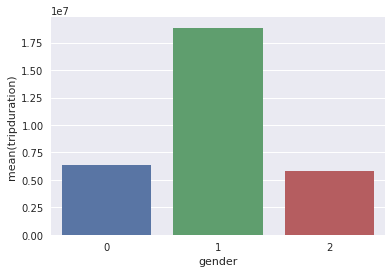

In [98]:
import seaborn as sns
ax = sns.barplot(x="gender", y="tripduration",  data=df1) 

In [107]:
f = {'tripduration':['mean','std','count']}
df2=df.groupby(['gender']).agg(f).reset_index()
df2["tripduration"]

,mean,std,count
0,2107.963952,10753.973359,2996
1,598.094675,11940.113693,31529
2,589.352276,1318.266665,9907


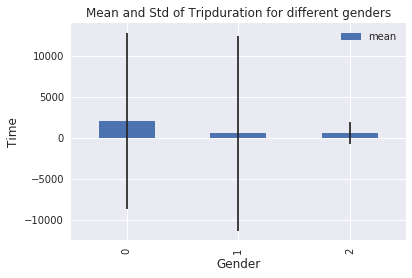

In [115]:
p = df2["tripduration"].plot(y='mean',kind='bar',yerr='std')
p.set_title("Mean and Std of Tripduration for different genders", fontsize=12)
p.set_xlabel("Gender", fontsize=12)
p.set_ylabel("Time", fontsize=12)